In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from AVN import *
import pandas as pd
from scipy.stats import norm
import scipy.io as scp
import os

In [2]:
######Load:

####Raw data:
#path_to_df0 = "/Users/claire/Desktop/new_all_run_files_for_etas/catalog_all/"
path_to_df0 = "/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas/catalog_all/"
df0 = pd.read_csv(path_to_df0+'raw_data_modified_version.csv')
###Structure : t, x, y, z, m, x_km, y_km

df_swarms = pd.read_csv("/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas/v0_d03_n50_every1_clusters/df_final_swarms_of_v0_d03_n50_every1.csv")
df_swarms["swarm_number"] = np.arange(0, len(df_swarms))

####The final version of swarms dataframe:
#df_swarms = pd.read_csv("new_df_final_swarms_of_v0_d03_n50_every1.csv")
###Structure : t1, t2, x1, x2, y1, y2, z1, z2, dbscan_cluster where x1,x2,y1,y2 in° and z1,z2 in km

print("Total swarms = ", len(df_swarms))

###Clusters from dbscan:
v0_n50_d0_3 = scp.loadmat("/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas/dbscan_data/v0_d03km_n50_every1.mat")["clusters"].reshape(-1) ##au moins 50 séismes à < 300 m, v = 0km/d : 1 séisme sur 1 comme vertex

###Add columns:
df0["dbscan"] = v0_n50_d0_3

######Assign EQ to swarms:
###Create a column of swarms number:
df0["swarms_num"] = np.zeros(len(df0)) -1


for i in range(0, len(df_swarms)):
    select_swarms = df0.index[(df0.t >= df_swarms.t1.iloc[i])&(df0.t <= df_swarms.t2.iloc[i])
                       & (df0.x >= df_swarms.x1.iloc[i])&(df0.x <= df_swarms.x2.iloc[i])
                       & (df0.y >= df_swarms.y1.iloc[i])&(df0.y <= df_swarms.y2.iloc[i])
                       & (df0.z >= df_swarms.z1.iloc[i])&(df0.z <= df_swarms.z2.iloc[i])]
    
    df0.swarms_num.iloc[select_swarms] = i
    
    
df0['swarms_num'] = df0['swarms_num'].astype('int')
print(df0["swarms_num"].max()+1)

###Remove all rows with a magnitude equal to a nan value:
df0 = df0.dropna()

df0.index = np.arange(0, len(df0))

from AVN import *

###Define AVN MS:
A, V, N, df_AVN = AVN(df0)

###Define EQ m >= 5: ##associated to gold color
df0_m5 = df0[df0.m >= 5]

###Rescale on Norcia event:
xN_km = df0.x_km - N.x_km
yN_km = df0.y_km - N.y_km

df0["xN_km"] = xN_km
df0["yN_km"] = yN_km

###Define AVN MS:
A, V, N, df_AVN = AVN(df0)

###Define EQ m >= 5: ##associated to gold color
df0_m5 = df0[df0.m >= 5]

df0

Total swarms =  41
41


,t,x,y,z,m,x_km,y_km,dbscan,swarms_num,xN_km,yN_km
0,0.004465,42.99118,12.92042,4.107,0.547416,4780.401106,1050.875824,2.0,-1,17.251893,-19.029404
1,0.024991,42.30519,13.68531,6.154,0.964305,4704.122499,1125.431260,-0.0,-1,-59.026715,55.526032
2,0.028414,43.52994,12.65680,14.826,0.025395,4840.308485,1020.365169,-0.0,-1,77.159272,-49.540059
3,0.030136,43.16713,12.99694,8.917,-0.127835,4799.965854,1054.068313,-0.0,-1,36.816640,-15.836915
4,0.043938,43.31555,12.55297,3.274,-0.889339,4816.469405,1015.584715,-0.0,-1,53.320191,-54.320513
...,...,...,...,...,...,...,...,...,...,...,...
894438,365.996726,42.81393,13.10829,7.216,-0.325824,4760.691806,1069.225754,233.0,-1,-2.457408,-0.679474
894439,365.997166,42.80558,13.14988,3.126,0.304970,4759.763328,1072.763006,-0.0,-1,-3.385886,2.857778
894440,365.997419,43.00835,13.14668,1.336,-0.183670,4782.310323,1068.979802,225.0,-1,19.161110,-0.925426
894441,365.999614,42.66073,13.21744,4.262,-0.273458,4743.656743,1080.795874,-0.0,-1,-19.492471,10.890646


In [3]:
##Get AF:
df0_AF = df0[df0.swarms_num == 12]

df0_AF

,t,x,y,z,m,x_km,y_km,dbscan,swarms_num,xN_km,yN_km
371322,106.715311,42.55120,13.27976,6.365,0.985403,4731.477563,1087.802733,183.0,12,-31.671651,17.897506
371324,106.715600,42.54940,13.27990,6.582,0.715522,4731.277412,1087.845572,183.0,12,-31.871802,17.940345
371329,106.716574,42.54786,13.28237,6.615,0.637292,4731.106172,1088.074751,183.0,12,-32.043042,18.169523
371334,106.717745,42.54799,13.28234,6.459,0.621319,4731.120627,1088.070027,183.0,12,-32.028587,18.164799
371337,106.718676,42.54188,13.27520,6.857,1.018079,4730.441226,1087.591567,-0.0,12,-32.707988,17.686339
...,...,...,...,...,...,...,...,...,...,...,...
383734,109.240680,42.56174,13.26807,6.778,-0.010139,4732.649557,1086.661602,183.0,12,-30.499656,16.756374
383784,109.251115,42.56155,13.26615,6.574,-0.008479,4732.628430,1086.507662,183.0,12,-30.520783,16.602434
383803,109.255816,42.53720,13.28961,5.930,0.064784,4729.920834,1088.853737,183.0,12,-33.228380,18.948509
383815,109.258627,42.56263,13.26811,6.460,-0.232351,4732.748521,1086.649377,183.0,12,-30.400693,16.744149


In [4]:
##Get all EQ m>=4:
df0_msup4 = df0[(df0.m > 4.4)&(df0.m < 4.6)]

df0_msup4.index = np.arange(0, len(df0_msup4)) ##easier to identify the one that we want

# ##the one we are interest in :
ind44 = df0_msup4[(df0_msup4.m >= 4)&(df0_msup4.t >=100)].index[0]
print(df0_msup4[(df0_msup4.m >= 4)&(df0_msup4.t >=100)].iloc[0], ind44)

df0_msup4

t              106.676432
x               42.542680
y               13.282080
z                6.494000
m                4.469807
x_km          4730.530182
y_km          1088.141279
dbscan         183.000000
swarms_num      -1.000000
xN_km          -32.619032
yN_km           18.236051
Name: 8, dtype: float64 8


,t,x,y,z,m,x_km,y_km,dbscan,swarms_num,xN_km,yN_km
0,9.740398,42.66018,13.21441,7.604,4.402162,4743.595586,1080.557668,233.0,-1,-19.553628,10.652440
1,11.186422,42.61765,13.29389,4.153,4.593349,4738.866466,1087.800097,237.0,-1,-24.282748,17.894870
2,72.904200,42.87114,13.12391,4.786,4.591935,4767.053267,1069.509030,-0.0,-1,3.904054,-0.396197
3,73.160026,43.05877,13.07724,4.010,4.510401,4787.916772,1062.460265,225.0,-1,24.767558,-7.444963
4,76.278676,42.79216,13.14363,6.933,4.450940,4758.271092,1072.485713,-0.0,-1,-4.878121,2.580485
5,76.280906,42.74503,13.17562,0.468,4.502736,4753.030475,1075.914338,233.0,-1,-10.118738,6.009110
6,76.504844,42.98071,13.09900,2.756,4.581534,4779.236896,1065.582013,-0.0,-1,16.087682,-4.323215
7,76.504873,42.84053,13.08070,6.041,4.428264,4763.649591,1066.516235,-0.0,-1,0.500377,-3.388993
8,106.676432,42.54268,13.28208,6.494,4.469807,4730.530182,1088.141279,183.0,-1,-32.619032,18.236051
9,156.427478,42.54068,13.30259,7.019,4.483533,4730.307792,1089.856482,-0.0,-1,-32.841422,19.951254


In [5]:
%%time

for num_swarm in [12]:

    num_swarm = int(num_swarm) #start at 1 and no 0...
    print("n°", num_swarm, ":")

    ##Select swarm data:
    select_swarms = df0[df0.swarms_num == num_swarm]
    
    ##Associated dbscan cluster:
    num_dbscan = df_swarms[df_swarms.swarm_number == num_swarm].num_EQ.values[0]
        
    ##Compute centroid of swarm:
    centro = np.array([np.mean(select_swarms.t.values),
                           np.mean(select_swarms.yN_km.values),
                           np.mean(select_swarms.xN_km.values), 
                           np.mean(select_swarms.z.values)])

    ###Parameters:
    t = 2
    f_dist = 1 ##km 
    print("f_dist (radius) =", f_dist, "km")

    df0_ = df0.copy()

    ###Selection of EQ based on only x,y axis:
    ##Seismicity around the swarm along the time [swarm.t - t; swarm.t + t] AND space distances d < f_dist:
    background_t_and_xy = df0_[(df0_.t >= round(select_swarms.t.min()-t, 2))&(df0_.t <= round(select_swarms.t.max()+t, 2))
                                &(df0_.xN_km >= select_swarms.xN_km.min()-f_dist)&(df0_.xN_km <= select_swarms.xN_km.max()+f_dist)
                                &(df0_.yN_km >= select_swarms.yN_km.min()-f_dist)&(df0_.yN_km <= select_swarms.yN_km.max()+f_dist)]
    #[swarm.t - t; swarm.t] AND space distances (x,y) +/- f_dist:
    background_mt_and_xy = df0_[(df0_.t >= round(select_swarms.t.min()-t, 2))&(df0_.t < round(select_swarms.t.min(), 2))
                                &(df0_.xN_km >= select_swarms.xN_km.min()-f_dist)&(df0_.xN_km <= select_swarms.xN_km.max()+f_dist)
                                &(df0_.yN_km >= select_swarms.yN_km.min()-f_dist)&(df0_.yN_km <= select_swarms.yN_km.max()+f_dist)]
    #[swarm.t; swarm.t+t] AND space distances (x,y) +/- f_dist:
    background_pt_and_xy = df0_[(df0_.t > round(select_swarms.t.max(), 2))&(df0_.t <= round(select_swarms.t.max()+t, 2))
                                &(df0_.xN_km >= select_swarms.xN_km.min()-f_dist)&(df0_.xN_km <= select_swarms.xN_km.max()+f_dist)
                                &(df0_.yN_km >= select_swarms.yN_km.min()-f_dist)&(df0_.yN_km <= select_swarms.yN_km.max()+f_dist)]
    ##[swarm.t; swarm.t] AND space distances (x,y) +/- f_dist:
    background_dt_and_xy = df0_[(df0_.t >= round(select_swarms.t.min(), 2))&(df0_.t <= round(select_swarms.t.max(), 2))
                                &(df0_.xN_km >= select_swarms.xN_km.min()-f_dist)&(df0_.xN_km <= select_swarms.xN_km.max()+f_dist)
                                &(df0_.yN_km >= select_swarms.yN_km.min()-f_dist)&(df0_.yN_km <= select_swarms.yN_km.max()+f_dist)]
        
    ##Seismicity around ]#the swarm along the time [swarm.t - t; swarm.t] AND space distances (x,y) +/- f_dist:
    swarms_mt = background_mt_and_xy[(background_mt_and_xy.xN_km >= select_swarms.xN_km.min())&(background_mt_and_xy.xN_km <= select_swarms.xN_km.max())
        & (background_mt_and_xy.yN_km >= select_swarms.yN_km.min())&(background_mt_and_xy.yN_km <= select_swarms.yN_km.max())]
    #[swarm.t; swarm.t + t] AND space distances (x,y) +/- f_dist:
    swarms_pt = background_pt_and_xy[(background_pt_and_xy.xN_km >= select_swarms.xN_km.min())&(background_pt_and_xy.xN_km <= select_swarms.xN_km.max())
        & (background_pt_and_xy.yN_km >= select_swarms.yN_km.min())&(background_pt_and_xy.yN_km <= select_swarms.yN_km.max())]
    #[swarm.t; swarm.t] AND space distances (x,y) +/- f_dist:
    swarms_dt = background_dt_and_xy[(background_dt_and_xy.xN_km >= select_swarms.xN_km.min())&(background_dt_and_xy.xN_km <= select_swarms.xN_km.max())
        & (background_dt_and_xy.yN_km >= select_swarms.yN_km.min())&(background_dt_and_xy.yN_km <= select_swarms.yN_km.max())]

    ##Cluster along the time [swarm.t - t; swarm.t + t] and within the space constrain:
    swarms_t = df0_[(df0_.t >= round(select_swarms.t.min()-t, 2))&(df0.t <= round(select_swarms.t.max()+t, 2))
                  & (df0_.x >= select_swarms.x.min())&(df0_.x <= select_swarms.x.max())
                  & (df0_.y >= select_swarms.y.min())&(df0_.y <= select_swarms.y.max())
                  & (df0_.z >= select_swarms.z.min())&(df0_.z <= select_swarms.z.max())]
    

n° 12 :
f_dist (radius) = 1 km
CPU times: user 66.8 ms, sys: 3.32 ms, total: 70.1 ms
Wall time: 68 ms


In [6]:
%%time

all_L0 = []
all_L1 = []
all_L2 = []
all_new_L = []

#
for i in range(0, len(df0_msup4)):
#for i in [1]:
    print("i:",i)
    
    ##Select swarm data:
    select_swarms = df0_msup4.iloc[i]

    ###Parameters:
    f_time = 2 ##d soit un interval de 4jrs
    f_dist = 1 ##km soit 2km de dimaètre
    #print("f_time =", f_time, "km")
    #print("f_dist (radius) =", f_dist, "km")

    ###Selection of EQ based on only x,y axis AND time domain:
        ###2 jours avant:
    select_data = df0[(df0.t >= round(select_swarms.t-t, 2))&(df0.t <= round(select_swarms.t, 2))
                                &(df0.xN_km >= select_swarms.xN_km.min()-f_dist)&(df0.xN_km <= select_swarms.xN_km.max()+f_dist)
                                &(df0.yN_km >= select_swarms.yN_km.min()-f_dist)&(df0.yN_km <= select_swarms.yN_km.max()+f_dist)]
    
    L0 = len(select_data) ##total nb of EQ
    L2 = len(select_data[select_data.m >=4]) ##total de EQ m>=4 i.e MS
    L0 = L0 - L2 ##remove MS
    all_L0.append(L0)
    print("t_i - 2 jours: Total EQ:", L0)
    
    ###2 jours après:
    select_data = df0[(df0.t >= round(select_swarms.t, 2))&(df0.t <= round(select_swarms.t+t, 2))
                                &(df0.xN_km >= select_swarms.xN_km.min()-f_dist)&(df0.xN_km <= select_swarms.xN_km.max()+f_dist)
                                &(df0.yN_km >= select_swarms.yN_km.min()-f_dist)&(df0.yN_km <= select_swarms.yN_km.max()+f_dist)]

    L1 = len(select_data) ##check total avec MS compris
    L2 = len(select_data[select_data.m >=4]) ##total de EQ m>=4 notamment MS 
    new_L = L1-L2 ##nb réel total de AF sans MS
    all_L1.append(L1)
    all_L2.append(L2)
    all_new_L.append(new_L)
    print("t_i + 2 jours: Total EQ:", new_L) ##if len(L2) == 1 i.e MS
    

i: 0
t_i - 2 jours: Total EQ: 18
t_i + 2 jours: Total EQ: 152
i: 1
t_i - 2 jours: Total EQ: 362
t_i + 2 jours: Total EQ: 793
i: 2
t_i - 2 jours: Total EQ: 26
t_i + 2 jours: Total EQ: 43
i: 3
t_i - 2 jours: Total EQ: 18
t_i + 2 jours: Total EQ: 157
i: 4
t_i - 2 jours: Total EQ: 13
t_i + 2 jours: Total EQ: 215
i: 5
t_i - 2 jours: Total EQ: 16
t_i + 2 jours: Total EQ: 167
i: 6
t_i - 2 jours: Total EQ: 30
t_i + 2 jours: Total EQ: 13
i: 7
t_i - 2 jours: Total EQ: 152
t_i + 2 jours: Total EQ: 127
i: 8
t_i - 2 jours: Total EQ: 25
t_i + 2 jours: Total EQ: 528
i: 9
t_i - 2 jours: Total EQ: 4
t_i + 2 jours: Total EQ: 159
i: 10
t_i - 2 jours: Total EQ: 0
t_i + 2 jours: Total EQ: 5
CPU times: user 293 ms, sys: 7.77 ms, total: 301 ms
Wall time: 285 ms


In [7]:
df0_msup4["AF"] = all_new_L

df0_msup4.sort_values('AF', ascending=False).head(6) ##44 est le 1er plus intense en qté de AF

/home/xianglo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,t,x,y,z,m,x_km,y_km,dbscan,swarms_num,xN_km,yN_km,AF
1,11.186422,42.61765,13.29389,4.153,4.593349,4738.866466,1087.800097,237.0,-1,-24.282748,17.894870,793
8,106.676432,42.54268,13.28208,6.494,4.469807,4730.530182,1088.141279,183.0,-1,-32.619032,18.236051,528
4,76.278676,42.79216,13.14363,6.933,4.450940,4758.271092,1072.485713,-0.0,-1,-4.878121,2.580485,215
5,76.280906,42.74503,13.17562,0.468,4.502736,4753.030475,1075.914338,233.0,-1,-10.118738,6.009110,167
9,156.427478,42.54068,13.30259,7.019,4.483533,4730.307792,1089.856482,-0.0,-1,-32.841422,19.951254,159
3,73.160026,43.05877,13.07724,4.010,4.510401,4787.916772,1062.460265,225.0,-1,24.767558,-7.444963,157


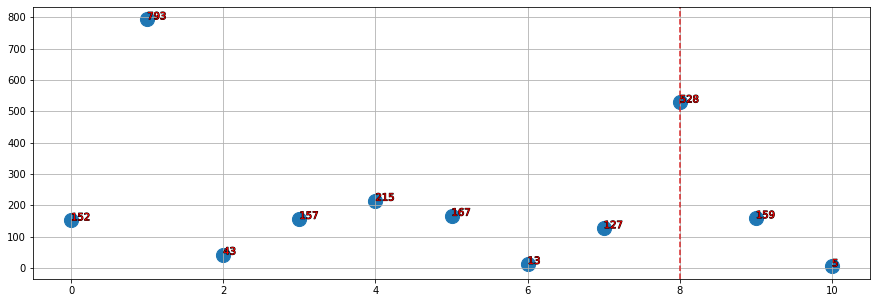

In [8]:
msize=200

plt.figure(figsize=(15,5))
plt.scatter(df0_msup4.index, all_new_L, s=msize)
for i in range(0, len(all_new_L)):
    plt.annotate(str(all_new_L[i]), 
             (df0_msup4.index[i], all_new_L[i]),
             color='r', alpha =1, size=10, 
             path_effects=[pe.withStroke(linewidth=1, foreground="k")])
plt.axvline(x=ind44, ls='--', c='tab:red')
plt.grid()
plt.show()

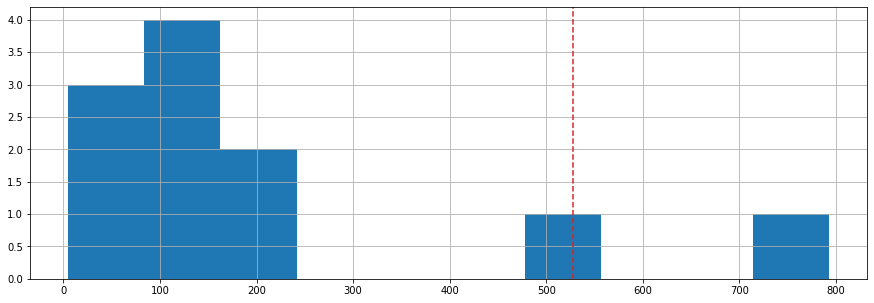

In [9]:
plt.figure(figsize=(15,5))
plt.hist(all_new_L)
plt.axvline(x=all_L1[ind44], ls='--', c='tab:red')
plt.grid()
plt.show()

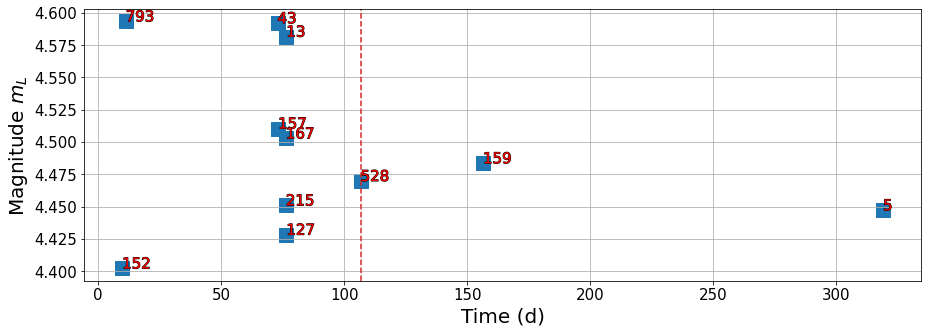

In [10]:
t0 = 2
msize= 200

plt.figure(figsize=(15,5))
plt.scatter(df0_msup4.t, df0_msup4.m, marker='s', s=msize)
#plt.scatter(select_swarms.t, select_swarms.m, marker='s')
#plt.scatter(background_mt_and_xy.t, background_mt_and_xy.m, marker='s')
#plt.scatter(swarms_mt.t, swarms_mt.m, marker='s')

# for i in range(0, len(df0_msup4)):
#     plt.axvline(df0_msup4.t.iloc[i]-t0, ls = '--', c='tab:blue')
#     plt.axvline(df0_msup4.t.iloc[i]+t0, ls = '--', c='tab:orange')

for i in range(0, len(all_new_L)):
    plt.annotate(str(all_new_L[i]), 
             (df0_msup4.t.iloc[i], df0_msup4.m.iloc[i]),
             color='r', alpha =1, size=15, 
             path_effects=[pe.withStroke(linewidth=1, foreground="k")])
    
plt.axvline(x=df0_msup4[(df0_msup4.m >= 4)&(df0_msup4.t >=100)].t.iloc[0], ls='--', c='tab:red')
plt.xlabel("Time (d)", fontsize=20)
plt.ylabel("Magnitude $m_L$", fontsize=20)
plt.tick_params(labelsize=15)
plt.grid()
plt.show()

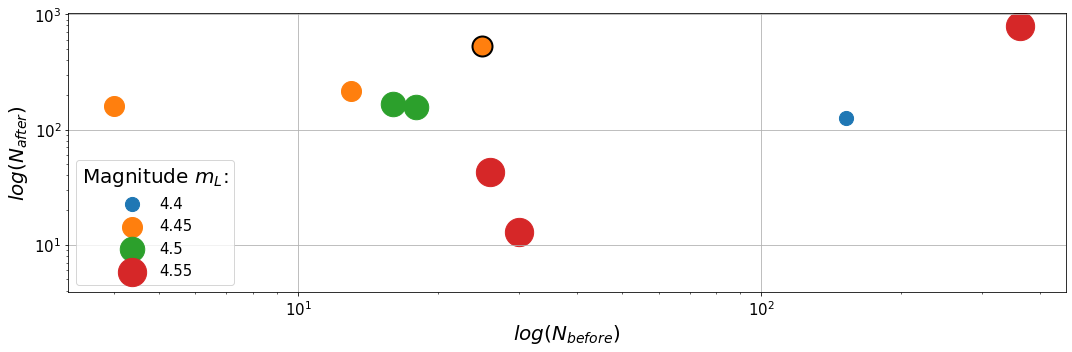

In [25]:
x = all_L0
y = all_new_L
a2 = df0_msup4.m

# Create the DataFrame from your randomised data and bin it using groupby.
df_ = pd.DataFrame(data=dict(x=x, y=y, a2=a2))
bins = np.arange(round(df_.a2.min(),1), round(df_.a2.max(),1)+0.05, 0.05)
grouped = df_.groupby(np.digitize(df_.a2, bins))

# Create some sizes and some labels.
sizes = [200*(i+1.) for i in range(0, len(bins))]
labels = bins #["$m_L = 4.4$", "$m_L = 4.5$", "$m_L = 4.6$"]

plt.figure(figsize=(15,5))
for i, (name, group) in enumerate(grouped):
    plt.scatter(group.x, group.y, s=sizes[i], alpha=1, label=labels[i])
    

plt.scatter(all_L0[ind44], all_new_L[ind44], s=sizes[1], facecolors='tab:orange', edgecolors='k', linewidths=2)

# plt.axvline(all_L0[ind44], ls='--', c='magenta')
# plt.axhline(all_new_L[ind44], ls='--', c='magenta')
plt.xlabel("$log(N_{before})$", fontsize=20)
plt.ylabel("$log(N_{after})$", fontsize=20)
plt.xscale("log")
plt.yscale("log")
plt.tick_params(labelsize=15)
plt.legend(title="Magnitude $m_L$:", title_fontsize=20, fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig('v0_d03_n50_every1_clusters/check_up_AF.png')
plt.show()

In [12]:
###Summarize parameters:
##t = +/- 2 days MS
##Radius = 1km
##Whole EQ catalog
##Mw = ]4.4, 4.6[ whole EQ catalog i.e pour tout t